# Task B

In [1]:
import csv as csv
import matplotlib.pyplot as plt
import torch
from mpl_toolkits.mplot3d import Axes3D

## Read data from file

In [2]:
length_weight = []
day = []
with open('data/day_length_weight.csv', newline='') as csv_file:
    csv_file.readline()
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        length_weight.append([float(row[1]), float(row[2])])
        day.append(float(row[0]))

In [3]:
x_train = torch.tensor(length_weight).reshape(-1, 2)
y_train = torch.tensor(day).reshape(-1, 1)

In [4]:
class LinearRegressionModel: 
    def __init__(self):
        self.W = torch.tensor([[0.0], [0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)
        
    def f(self, x):
        return x @ self.W + self.b
    
    def loss(self, x, y):
        #return torch.mean(torch.square(self.f(x) - y))
        return torch.mean(torch.pow(self.f(x) - y, 2))

In [5]:
model = LinearRegressionModel()

## Optimizing

In [6]:
optimizer = torch.optim.SGD([model.b, model.W], 0.000015)
for epoch in range(10000):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()
print('Done')

Done


## Results

In [7]:
print('W = %s, b = %s, loss = %s' % (model.W, model.b, model.loss(x_train, y_train)))

W = tensor([[-0.9294],
        [81.7830]], requires_grad=True), b = tensor([[-13.7667]], requires_grad=True), loss = tensor(91912.0938, grad_fn=<MeanBackward0>)


## Plotting

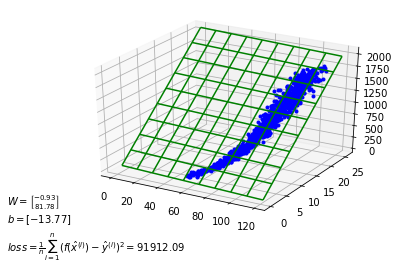

In [8]:
fig = plt.figure('Linear Regression 3D')
plot1 = fig.add_subplot(111, projection='3d')
plot1.plot(x_train[:, 0].squeeze().tolist(),
           x_train[:, 1].squeeze().tolist(),
           y_train[:, 0].squeeze().tolist(),
           '.',
           label='$(\\hat x_1^{(i)}, \\hat x_2^{(i)},\\hat y^{(i)})$',
           color='blue')
plot1_f = plot1.plot_wireframe(torch.tensor([[]]), torch.tensor([[]]), torch.tensor([[]]), color='green', label='$y = f(x) = xW+b$')
plot1_info = fig.text(0.01, 0.02, '')
plot1_loss = []
for x in range(0, x_train.shape[0]):
    line, = plot1.plot([0,0], [0,0], [0,0], color='red')
    plot1_loss.append(line)
    if x == 0:
        line.set_label('$|f(\\hat x^{(i)})-\\hat y^{(i)}|$')

plot1_f.remove()
x1_grid, x2_grid = torch.meshgrid(torch.linspace(1, torch.max(x_train[:,0] + 1), 10), torch.linspace(1, torch.max(x_train[:,1] + 1), 10))
y_grid = torch.empty([10, 10])
for i in range(0, x1_grid.shape[0]):
    for j in range(0, x1_grid.shape[1]):
        a = [[x1_grid[i, j], x2_grid[i, j]]]
        x_plot = torch.FloatTensor(a)
        y_grid[i, j] = model.f(x_plot)
plot1_f = plot1.plot_wireframe(x1_grid.detach(), x2_grid.detach(), y_grid.detach(), color='green')

for i in range(0, x_train.shape[0]):
    plot1_loss[i].set_data(torch.tensor([x_train[i, 0], x_train[i, 0]]), torch.tensor([x_train[i, 1], x_train[i, 1]]))
    #plot1_loss[i].set_3d_properties(torch.tensor([y_train[i, 0], model.f(x_train[i, :])]))

plot1_info.set_text(
    '$W=\\left[\\stackrel{%.2f}{%.2f}\\right]$\n$b=[%.2f]$\n$loss = \\frac{1}{n}\\sum_{i=1}^{n}(f(\\hat x^{(i)}) - \\hat y^{(i)})^2 = %.2f$' %
    (model.W[0, 0], model.W[1, 0], model.b[0, 0], model.loss(x_train, y_train)))

plt.show()